In [1]:
import jieba as jb,  numpy as np, os, pandas as pd, random, re
import matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.font_manager import FontProperties
from os import path
from subprocess import check_output
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import get_single_color_func, WordCloud

In [2]:
from snownlp import SnowNLP

In [3]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.subplot.bottom'] = .1
ChineseFont1 = FontProperties(fname='./hanazono-20160201 (1)/HanaMinA.ttf')
sns.set(color_codes=True)

In [4]:
stopwords = [',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', 
             '（', '）', ',', ':', 'hi', 'auntie', 'ok', '向左走', '向右走', '大家', '利申', 
             '雖然', '但係', '乜', '一齊', '可以', '應該', '好多', '已經', '因為', '邊個',
             '好似', '而家', '一定', '之前', '即刻', '好過', '仲有', '如果', '其實', '一半',
             '有人', '個人', '一次', '無人', '好好', '根本', '一樣', '成日', '問題', '不過',
             '有時', '之後', '沒有', '所以', '不如', '個個', '無法']

In [5]:
data_files = ['./input/golden_response_6845074.csv']

In [6]:
df = pd.read_csv(data_files[0])

In [7]:
sents = df.response.values

In [8]:
print(sents)

['周庭都唔支持' '算啦|泛民成班傻的嗎勁|圍內分豬肉|關其他人咩事？|今日仲係新世紀出面鬼殺咁嘈|話自己要抗衡建設|真係人唔笑|狗都吠'
 '遠離泛民 背信棄義 個人利益' '你呢個支持者,連周庭唔使初選都唔知?|想知結果? 聽D100 睇毒果, 一個月前已知邊個win' '聽日下嘛'
 '聽講廣告界有句名言就係|千祈唔好擺晒d plan畀個客揀|我唔明初選開放畀選民投做咩|虛怯到咁' '投乜向左走向右走呀麻向左走向右走煩'
 '得九西同新界東至有|好多高登仔係新界西' '新東表示投佢老母閪|入場費要八萬五|戇向左走向右走勁' '投唔投都無分別。']


In [9]:
sents_list = []
for sent in sents:
    if not isinstance(sent, str):
        continue
    sent = sent.split('|')
    for s in sent:
        for stopword in stopwords:
            s = s.replace(stopword, '')
        sents_list.append(s)
data = pd.DataFrame(sents_list, columns=['Sent'])

In [10]:
data

,Sent
0,周庭都唔支持
1,算啦
2,泛民成班傻的嗎勁
3,圍內分豬肉
4,關其他人咩事
5,今日仲係新世紀出面鬼殺咁嘈
6,話自己要抗衡建設
7,真係人唔笑
8,狗都吠
9,遠離泛民 背信棄義 利益


In [11]:
sentiments = []
for s in data.Sent.values:
    sn = SnowNLP(s)
    print(sn.words)
    #print(sn.keywords(3))
    #print(sn.summary(2))
    #print(sn.sentences)
    #print(sn.words)
    sentiments.append(sn.sentiments)
data['Sentiments'] = sentiments

['周庭', '都唔', '支持']
['算', '啦']
['泛', '民', '成班', '傻', '的', '嗎', '勁']
['圍', '內', '分豬', '肉']
['關', '其他', '人', '咩', '事']
['今日', '仲', '係', '新', '世紀', '出面', '鬼', '殺咁', '嘈']
['話', '自己', '要', '抗衡', '建', '設']
['真', '係', '人', '唔笑']
['狗', '都', '吠']
['遠', '離泛', '民', '背', '信', '棄義', '利益']
['你', '呢', '個', '支持', '者連', '周庭', '唔', '使', '初', '選', '都', '唔', '知']
['想', '知', '結果', '聽', 'D100', '睇毒', '果', '一', '個', '月', '前', '已', '知', 'win']
['聽日', '下', '嘛']
['聽講廣', '告', '界', '有', '句', '名言', '就', '係']
['千', '祈', '唔', '好擺', '晒', 'd', 'plan', '畀個', '客', '揀']
['我', '唔明', '初選', '開', '放', '畀', '選', '民', '投', '做', '咩']
['虛', '怯到', '咁']
['投', '呀麻', '煩']
['得', '九西', '同', '新界', '東', '至', '有']
['高', '登', '仔係', '新界', '西']
['新東', '表示', '投', '佢', '老母', '閪']
['入場', '費要', '八', '萬', '五']
['戇', '勁']
['投唔', '投', '都', '無', '分', '別']


In [12]:
data

,Sent,Sentiments
0,周庭都唔支持,0.576417
1,算啦,0.576570
2,泛民成班傻的嗎勁,0.171368
3,圍內分豬肉,0.243535
4,關其他人咩事,0.718474
5,今日仲係新世紀出面鬼殺咁嘈,0.994862
6,話自己要抗衡建設,0.433817
7,真係人唔笑,0.867811
8,狗都吠,0.572431
9,遠離泛民 背信棄義 利益,0.553351


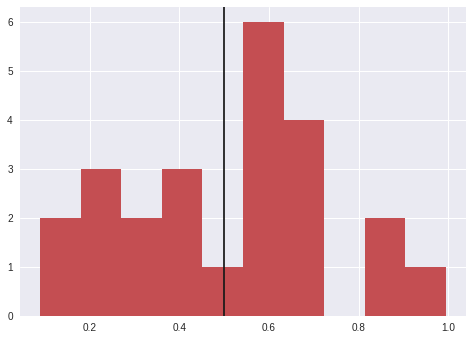

In [13]:
data['Sentiments'].hist(color='r')
plt.axvline(x=0.5, c='k')
plt.show()

In [14]:
data['p/n'] = data['Sentiments'].apply(lambda x: 1 if x > 0.5 else -1)

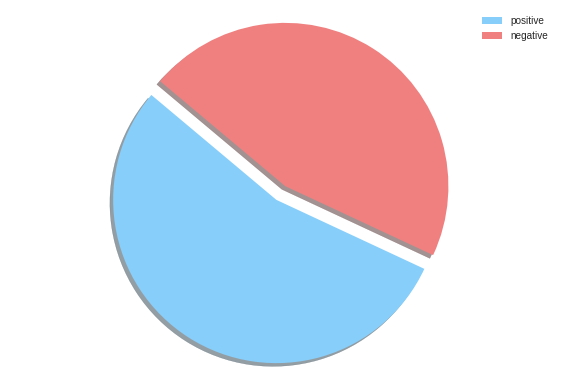

In [15]:
labels = ['positive', 'negative']
sizes = [len(data[data['p/n']==1])/len(data), len(data[data['p/n']==-1])/len(data)]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

patches, text = plt.pie(sizes, explode=explode, colors=colors, shadow=True, startangle=140)
plt.axis('equal')
plt.legend(patches, labels, loc='best')
plt.tight_layout()
plt.show()

In [16]:
sents_list = []
data_files = []
folder = './input/'
for subdir, dirs, files in os.walk(folder):
    for f in files:
        data_files.append(subdir + f)
for f in data_files:
    df = pd.read_csv(f)
    sents = df.response.values
    for sent in sents:
        if not isinstance(sent, str):
            continue
        sent = sent.replace('，', '|').replace('。', '|').replace(',', '|').replace('.', '|').split('|')
        for s in sent:
            sents_list.append(s)
data = pd.DataFrame(sents_list, columns=['Sent'])
sentiments = []
for s in data.Sent.values:
    try:
        sn = SnowNLP(s)
        sentiments.append([s, sn.sentiments])
    except:
        pass
data = pd.DataFrame(sentiments, columns=['Sentences', 'Sentiments'])

In [17]:
data[data.Sentiments >= 0.999]

,Sentences,Sentiments
357,講野係借d倚貼埋d睇對方有無抗拒姐,0.999388
503,杰克遜指特朗普亦明白自己略為瘦身會更健康,0.999758
548,023票擊敗民主黨單仲偕及人民力量主席袁彌明當選,0.999911
965,想奶想奶想奶想奶,0.999950
1701,東亞班懵豬眼就留返係自己地方圍埋黎賤啦！係都要死去人地文明社會咪抵比人笑,0.999134
1816,大陸曝光多起初中教師性侵學生案件,0.999049
2104,香港人唔配有張秀賢！,0.999114
2949,如果新北人民將用係犯風化案既頭腦同勇氣用係反攻大陸上面,0.999667
3001,尤其係我哋今次有機會同動作影后元秋同台演出,0.999067
4244,唔好蛇王、唔好偷原子筆、唔好…,0.999419


In [18]:
data[data.Sentiments <= 0.001]

,Sentences,Sentiments
1187,教練的指揮意圖將通過助理教練傳達給在場球員；如果教練和助理教練都被趕上看台,0.000066
2400,鬼佬見證呢廿年温水煮蛙 之前先有個鄉里被拒入境 出篇文抒發下情懷你都嬲 真係要到肥彭都原機遣...,0.000060
2481,4個都差唔多樣 無所謂啦,0.000093
2674,有時youtube聽歌碌comment 時不時都見到有人話咩年紀大左聽返同一首歌有唔同體會,0.000377
3883,但係見住佢地咁樣亂咁嚟真係睇唔過眼,0.000734
4204,」男生仍死不認錯：「那也罪不至死吧？幹嗎那麼認真？以後改還不行嗎？」經理斬釘截鐵說：「不,0.000004
4672,小弟工作的蚊型公司最近買了架16年水貨豐田Alphard 買入大約57萬 月供大約萬幾蚊,0.000536
5021,美國與加拿大邀集當年韓戰參戰國舉行外交部長會議,0.000585


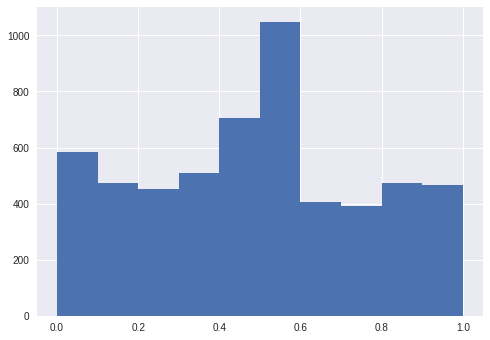

In [19]:
data.Sentiments.hist()
plt.show()

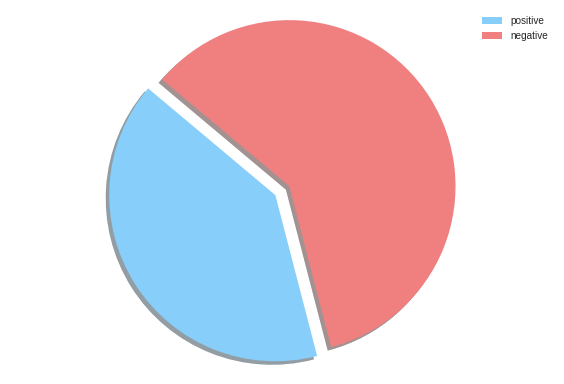

In [20]:
data['p/n'] = data['Sentiments'].apply(lambda x: 1 if x > 0.5 else -1)
labels = ['positive', 'negative']
sizes = [len(data[data['p/n']==1])/len(data), len(data[data['p/n']==-1])/len(data)]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

patches, text = plt.pie(sizes, explode=explode, colors=colors, shadow=True, startangle=140)
plt.axis('equal')
plt.legend(patches, labels, loc='best')
plt.tight_layout()
plt.show()

In [21]:
data_pos = data[data['p/n']==1]
data_neg = data[data['p/n']==-1]

In [22]:
def sent_token(sent, StopWords=True, RemoveHttp=True):
  if RemoveHttp == True:
    sent = re.sub(r'^https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
  words = '/'.join(jb.cut(sent)).split('/')
  if StopWords == True:
    words = [w for w in words if w not in stopwords]
  return words

In [23]:
def tfidfvectorizer(words_list, max_features=1000, n_top_words=50, n_components=10, return_model=False):
  def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
      print("Topic #%d:" % topic_idx)
      print(" ".join([feature_names[i]
                      for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

  sents = []
  for words in words_list:
    sents.append(' '.join(words))
  vtr = CountVectorizer(max_df=0.85, min_df=2,
                        max_features=max_features)
  vtr_sents = vtr.fit_transform(sents)

  lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                  learning_method='online',
                                  learning_offset=50,
                                  random_state=12345)
  lda.fit(vtr_sents)
  if return_model == True:
    return lda, vtr_sents, vtr
  vtr_feature_names = vtr.get_feature_names()
  #print_top_words(lda, vtr_feature_names, n_top_words)
  lda_words_list = []
  for topic_idx, topic in enumerate(lda.components_):
    term = [topic_idx, [vtr_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]]
    lda_words_list.append(term)
  return lda_words_list

In [24]:
def proportion_of_topic(model, feature_names, num_top_words=10, num_topics=5):
  components = model.components_.T
  word_topic = components / np.sum(components, axis=0)
  fontsize_base = 70 / np.max(word_topic)
  for i in range(num_topics):
    plt.subplot(1, num_topics, i + 1)
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(i))
    top_words_idx = np.argsort(word_topic[:, i])[::-1]
    top_words_idx = top_words_idx[:num_top_words]
    top_words = []
    for idx in top_words_idx:
      top_words.append(feature_names[idx])
    top_words_shares = word_topic[top_words_idx, i]
    for j, (word, share) in enumerate(zip(top_words, top_words_shares)):
      plt.text(0.3, num_top_words-j-0.5, word, fontsize=fontsize_base*share, fontproperties=ChineseFont1)
  plt.show()

In [25]:
class GroupedColorFunc(object):
  # Source: https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html?highlight=color_func
  def __init__(self, color_to_words, default_color):
    self.color_func_to_words = [
        (get_single_color_func(color), set(words))
        for (color, words) in color_to_words.items()]
    self.default_color_func = get_single_color_func(default_color)

  def get_color_func(self, word):
    """Returns a single_color_func associated with the word"""
    try:
      color_func = next(
          color_func for (color_func, words) in self.color_func_to_words
          if word in words)
    except StopIteration:
      color_func = self.default_color_func
    return color_func

  def __call__(self, word, **kwargs):
    return self.get_color_func(word)(word, **kwargs)

In [26]:
def word_clouds(terms, groupbycolor=True, num_top_words=20, num_topics=5, background_color='white', default_color='grey'):
  def terms_to_wordcounts(terms, multiplier=1000):
    wordcounts = ''
    for i in terms:
      for j in range(num_top_words):
        wordcounts += ' '.join(int(((num_top_words - j) * multiplier)) * [i[1][j]])
    return wordcounts
  wordcounts = terms_to_wordcounts(terms)
  font_path = './hanazono-20160201 (1)/HanaMinA.ttf'
  wordcloud = WordCloud(font_path=font_path, background_color=background_color, collocations=False).generate(wordcounts)
  if groupbycolor == True:
    default_color = default_color
    color_list = []
    r = lambda: random.randint(200, 255)
    for i in range(num_topics):
      color_list.append('#%02X%02X%02X' % (r(), r(), r()))
    color_to_words = {color_list[i]: terms[i][1] for i in range(num_topics)}
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)
    wordcloud.recolor(color_func=grouped_color_func)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [27]:
words_list_pos = []
sents = data_pos.Sentences.values
for sent in sents:
    if not isinstance(sent, str):
        continue
    sent = sent.split('|')
    for s in sent:
        words_list_pos.append(sent_token(s))

Building prefix dict from /usr/local/lib/python3.5/dist-packages/jieba/dict.txt ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.238 seconds.
Prefix dict has been built succesfully.


In [28]:
words_list_neg = []
sents = data_neg.Sentences.values
for sent in sents:
    if not isinstance(sent, str):
        continue
    sent = sent.split('|')
    for s in sent:
        words_list_neg.append(sent_token(s))

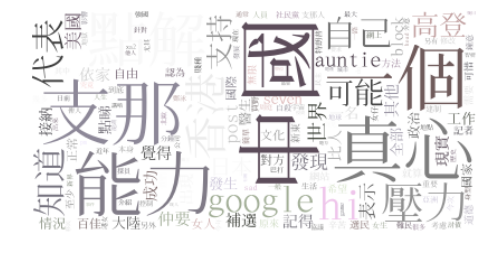

In [29]:
lda_words_list_pos = tfidfvectorizer(words_list_pos)
word_clouds(lda_words_list_pos)

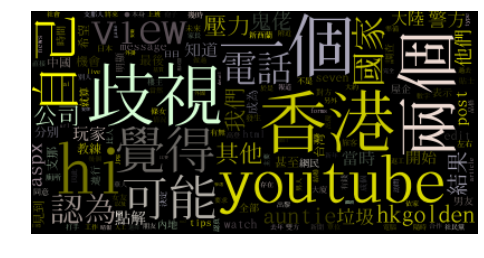

In [30]:
lda_words_list_neg = tfidfvectorizer(words_list_neg)
word_clouds(lda_words_list_neg, background_color='black', default_color='yellow')